In [11]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

# Exercise 5.12

In [12]:
def f(z):
    a=z/(1-z)
    num=a**3
    d1=(1-z)**2
    d2=(np.exp(a)-1)
    return num/(d1*d2)


In [13]:
a=0
b=1
N=31
x,w=gaussxwab(N,a,b)
integ=0
for i in range(N):
    integ+=f(x[i])*w[i]
integ

6.4939400459836785

In [14]:
kb=1.38064852*10**(-23)
c=299792458
h=6.62607004*10**(-34)

hbar=h/(2*np.pi)
Boltz=kb**4/(4*(np.pi)**2*c**2*hbar**3)*integ

In [15]:
Boltz

5.670367378162837e-08

# Exercise 5.13


In [50]:
# Hermite Polynomial
def H(n,x):
    if n==0:
        return 1
    if n==1:
        return 2*x
    hermite=[0]*(n+1)
    hermite[0]=1
    hermite[1]=2*x
    for i in range(2,n+1):
        hermite[i]=2*x*hermite[i-1]-2*(i-1)*hermite[i-2]
    return hermite[n]            

In [51]:
def psi(n,x):
    prefactor=1/np.sqrt(2**n*factorial(n)*np.sqrt(np.pi))
    expo=np.exp(-x**2/2)
    herm=H(n,x)
    return prefactor*expo*herm

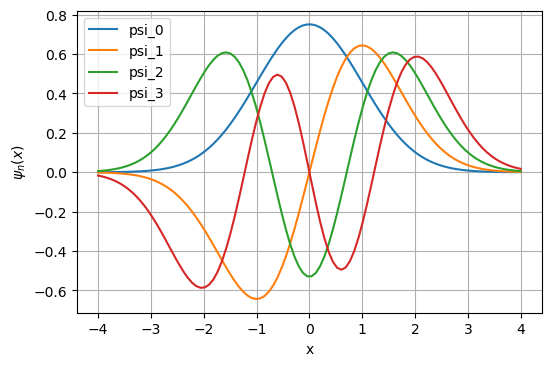

In [76]:
xval=np.linspace(-4,4,100)
wavfuncs=[]
for i in range(4):
    wave=[psi(i,x) for x in xval]
    wavfuncs.append(wave)
plt.figure(dpi=100)
for i in range(4):
    plt.plot(xval,wavfuncs[i], label=f'psi_{i}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi_{n}(x)$')
plt.grid()

Text(0, 0.5, '$\\psi_{30}(x)$')

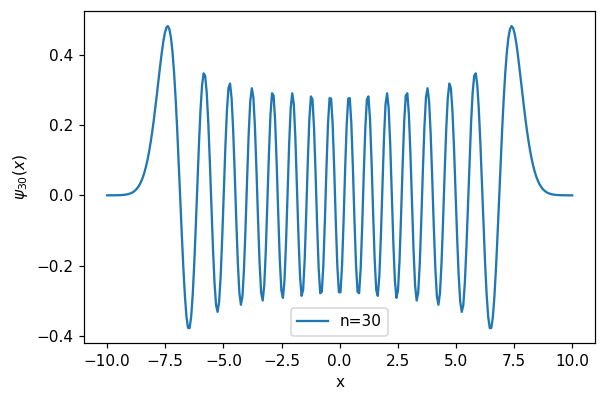

In [79]:
n=30
xval=np.linspace(-10,10,300)
wave=[psi(n,x) for x in xval]
plt.figure(dpi=110)
plt.plot(xval,wave, label='n=30')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi_{30}(x)$')



In [83]:
# <x^2>
n=5
a=-1
b=1
N=100
x,w=gaussxwab(N,a,b)
def f(z):
    x=z/(1-z**2)
    wf=psi(n,x)
    return (x**2)*(wf**2)*((1+z**2)/(1-z**2)**2)
integ=0
for i in range(N):
    integ+=f(x[i])*w[i]
integ**(0.5)

2.3452078737858177